<a href="https://colab.research.google.com/github/data04190/Kaggle/blob/main/Fruits360/%EC%A3%BC%EC%84%B1%EB%B6%84%EB%B6%84%EC%84%9D(PCA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **주성분분석(PCA)**

In [1]:
!wget http://bit.ly/fruits_300 -O fruits_300.npy
import numpy as np
fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1,100*100)

--2021-08-23 07:52:11--  http://bit.ly/fruits_300
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hongong-ml/raw/master/fruits_300.npy [following]
--2021-08-23 07:52:11--  https://github.com/rickiepark/hongong-ml/raw/master/fruits_300.npy
Resolving github.com (github.com)... 13.114.40.48
Connecting to github.com (github.com)|13.114.40.48|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hongong-ml/master/fruits_300.npy [following]
--2021-08-23 07:52:12--  https://raw.githubusercontent.com/rickiepark/hongong-ml/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... 

In [2]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 50)  #주성분의 개수 50으로 지정.
pca.fit(fruits_2d)

PCA(copy=True, iterated_power='auto', n_components=50, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [3]:
pca.components_.shape

(50, 10000)

In [4]:
import matplotlib.pyplot as plt
def draw_fruits(arr, ratio =1):
  n = len(arr)
  rows = int(np.ceil(n/10))
  cols = n if rows < 2 else 10
  
  fig, axs = plt.subplots(rows, cols,
                          figsize = (cols*ratio, rows*ratio),squeeze = False)
  
  for i in range(rows):
    for j in range(cols):
      if i*10 + j <n :
        axs[i, j].imshow(arr[i*10 + j], cmap = 'gray_r')
      axs[i,j].axis('off')
  plt.show()

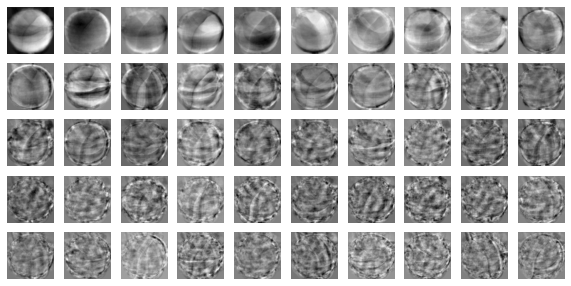

In [5]:
draw_fruits(pca.components_.reshape(-1,100,100))

In [6]:
fruits_2d.shape

(300, 10000)

In [7]:
fruits_pca = pca.transform(fruits_2d)
fruits_pca.shape

(300, 50)

In [8]:
# 원본 데이터 재구성
fruits_inverse = pca.inverse_transform(fruits_pca)
fruits_inverse.shape

(300, 10000)

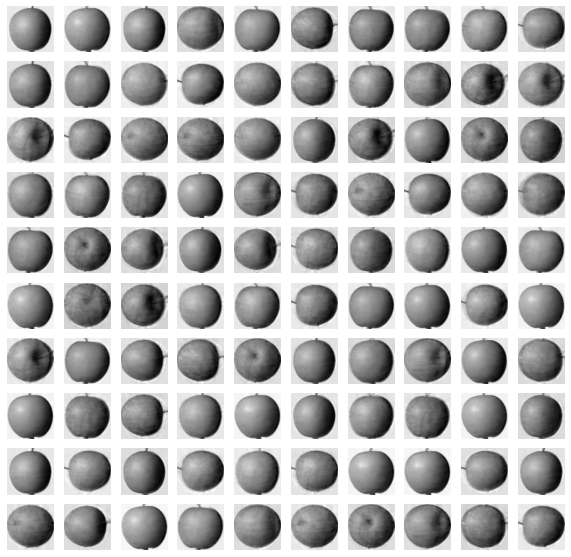

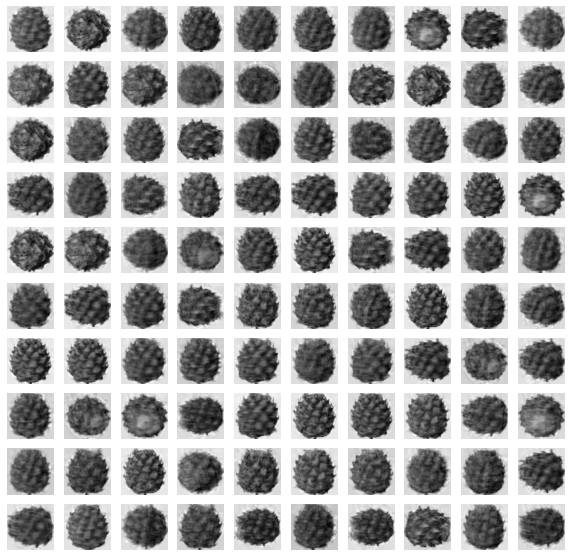

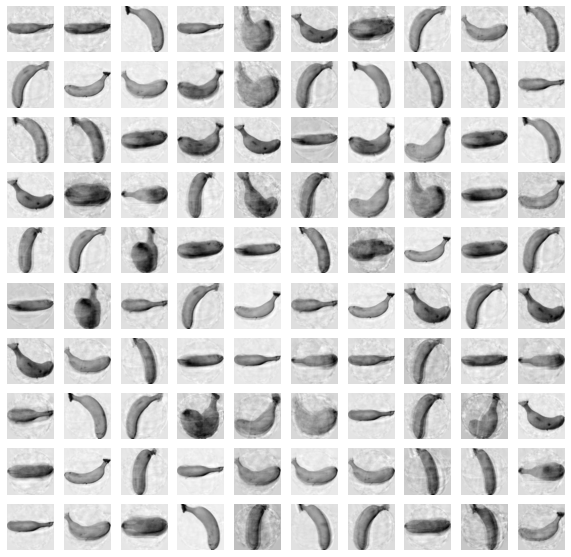

In [9]:
fruits_reconstruct = fruits_inverse.reshape(-1,100,100)
for start in [0,100,200]:
  draw_fruits(fruits_reconstruct[start: start+100])
  print('\n')

In [10]:
#explained variance
np.sum(pca.explained_variance_ratio_)

0.9214953089151028

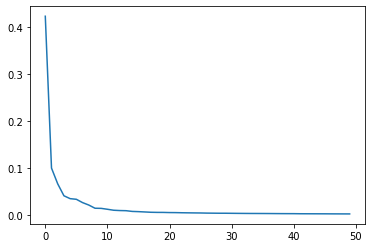

In [11]:
#적절한 주성분 개수 찾기
plt.plot(pca.explained_variance_ratio_)


- 10개의 주성분이 대부분의 분산을 표현하고 있음을 확인할 수 있음.

In [12]:
# PCA로 축소한 데이터로 지도학습에 적용
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()


In [13]:
target = np.array([0]*100 + [1]*100 + [2]*100) #지도 학습 모델을 위한 타깃값 설정.

In [14]:
# 원본데이터 교차 검증
from sklearn.model_selection import cross_validate
scores = cross_validate(lr, fruits_2d, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time'])) #훈련 시간

0.9966666666666667
1.48752760887146


In [15]:
#PCA로 축소한 데이터 교차 검증
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

1.0
0.02874002456665039


- 50개의 특성만 사용하였는데도 정확도가 100%가 나옴.
- PCA로 훈련데이터의 차원을 축소할 경우 저장공간뿐만 아니라 , 머신러닝 모델의 훈련속도도 높일 수 있음 (훈련시간 1.4초 -> 0.03초로 감소)

In [16]:
pca = PCA(n_components=0.5) # 설명된 분산의 50%에 달하는 주성분을 찾도록 PCA 모델 만듬.
pca.fit(fruits_2d)

PCA(copy=True, iterated_power='auto', n_components=0.5, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [17]:
pca.n_components_

2

- 2개의 특성만으로 원본 데이터에 있는 분산의 50%를 표현할 수 있음.


In [18]:
fruits_pca = pca.transform(fruits_2d)
fruits_pca.shape  #주성분이 2개이므로 변환된 데이터 크기 (300,2)

(300, 2)

In [19]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9933333333333334
0.05172920227050781


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


- 2개의 특성만으로도 정확도가 99%가 나옴.

In [20]:
# 차원 축소된 데이터로 k-평균 알고리즘 클러스터
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 3, random_state = 42)
km.fit(fruits_pca)
np.unique(km.labels_, return_counts=True)

(array([0, 1, 2], dtype=int32), array([ 91,  99, 110]))

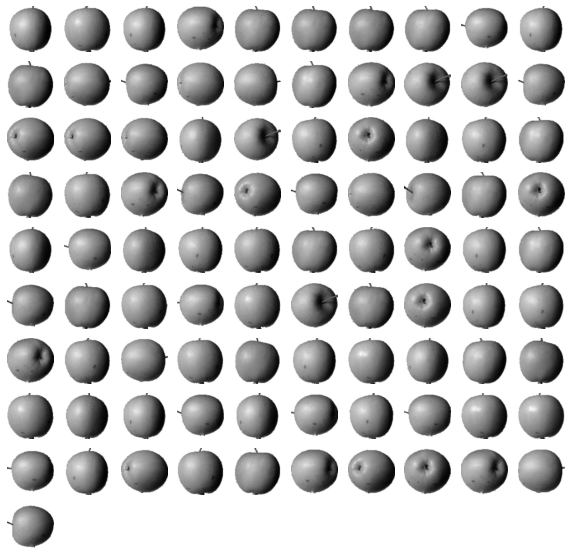

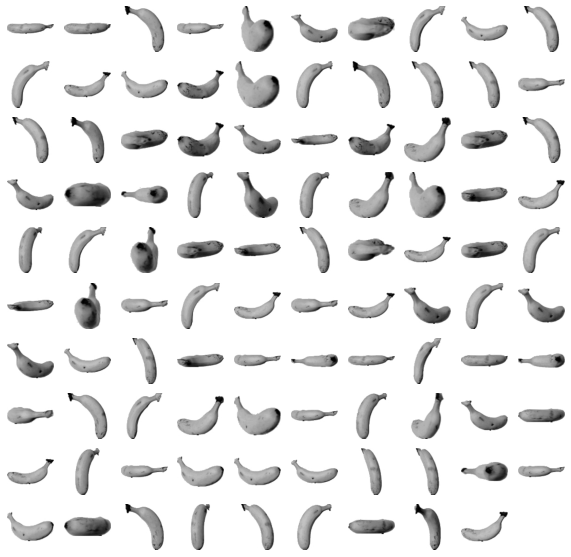

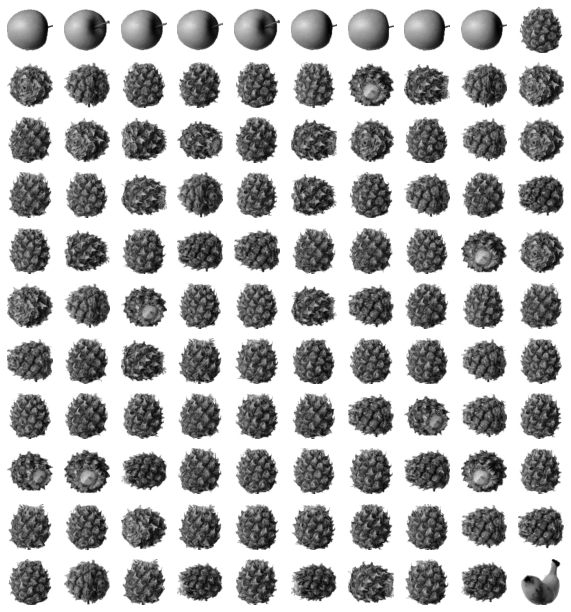

In [22]:
for label in range(0,3):
  draw_fruits(fruits[km.labels_ == label])
  print('\n')

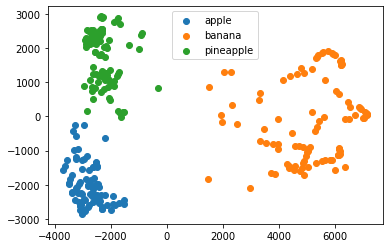

In [23]:
for label in range(0,3):
  data = fruits_pca[km.labels_ == label]
  plt.scatter(data[:,0], data[:,1])
plt.legend(['apple','banana','pineapple'])


- 3개 이하의 차원으로 줄이면 데이터를 시각화하기 좋음.
- 사과와 파인애플 클러스터 경계가 가깝게 붙어 있어서 파인애플과 사과의 샘플은 몇 개가 혼동을 일으키기 쉬워 보임을 알 수 있음.